In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

In [13]:
import xgboost as xgb

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [19]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [20]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [22]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blood_glucose_level'>

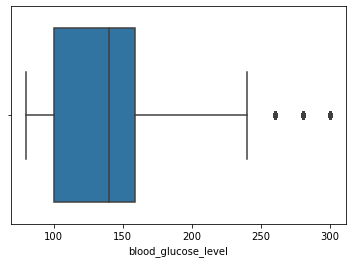

In [24]:
sns.boxplot(df['blood_glucose_level'])

In [25]:
q1=df['blood_glucose_level'].quantile(0.25)

In [26]:
q3=df['blood_glucose_level'].quantile(0.75)

In [27]:
IQR=q3-q1

In [28]:
lower=q1-1.5*IQR

In [29]:
higher=q3+1.5*IQR

In [30]:
df=df[(df['blood_glucose_level']>lower) & (df['blood_glucose_level']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blood_glucose_level'>

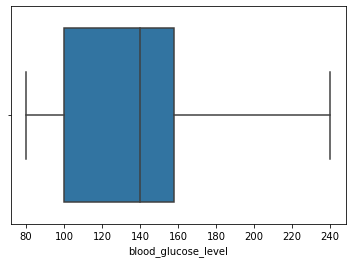

In [31]:
sns.boxplot(df['blood_glucose_level'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

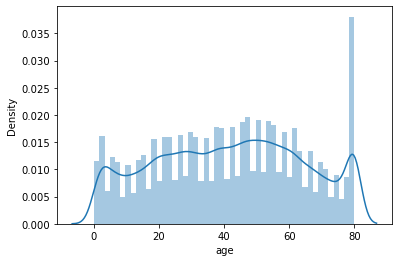

In [32]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='blood_glucose_level', ylabel='Density'>

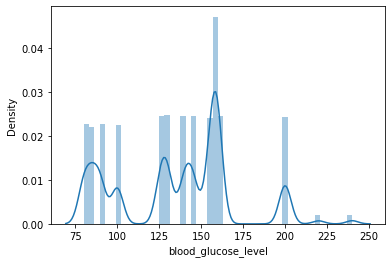

In [33]:
sns.distplot(df['blood_glucose_level'])

In [34]:
df['blood_glucose_level']=np.log(df['blood_glucose_level'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_20464\2098596102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood_glucose_level']=np.log(df['blood_glucose_level'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='blood_glucose_level', ylabel='Density'>

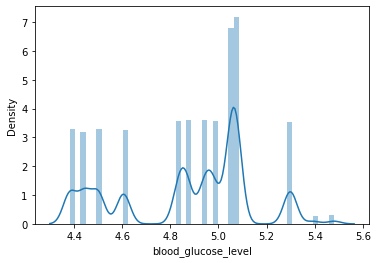

In [35]:
sns.distplot(df['blood_glucose_level'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

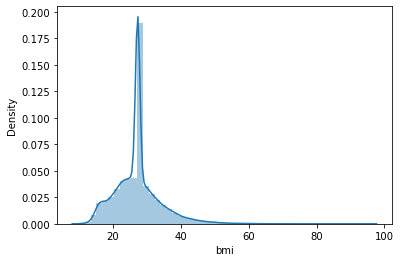

In [36]:
sns.distplot(df['bmi'])

In [37]:
df['bmi']=np.log(df['bmi'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_20464\640260106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi']=np.log(df['bmi'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

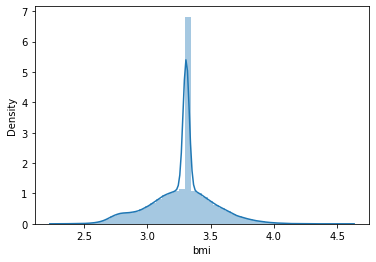

In [38]:
sns.distplot(df['bmi'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HbA1c_level', ylabel='Density'>

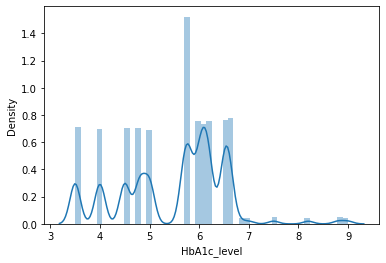

In [39]:
sns.distplot(df['HbA1c_level'])

In [40]:
df['HbA1c_level']=np.log(df['HbA1c_level'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_20464\960539271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HbA1c_level']=np.log(df['HbA1c_level'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HbA1c_level', ylabel='Density'>

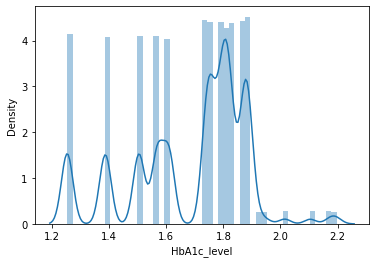

In [41]:
sns.distplot(df['HbA1c_level'])

In [42]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,3.226447,1.887070,4.941642,0
1,Female,54.0,0,0,No Info,3.307619,1.887070,4.382027,0
2,Male,28.0,0,0,never,3.307619,1.740466,5.062595,0
3,Female,36.0,0,0,current,3.154870,1.609438,5.043425,0
4,Male,76.0,1,1,current,3.002708,1.568616,5.043425,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,3.307619,1.824549,4.499810,0
99996,Female,2.0,0,0,No Info,2.854745,1.871802,4.605170,0
99997,Male,66.0,0,0,former,3.326115,1.740466,5.043425,0
99998,Female,24.0,0,0,never,3.567277,1.386294,4.605170,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

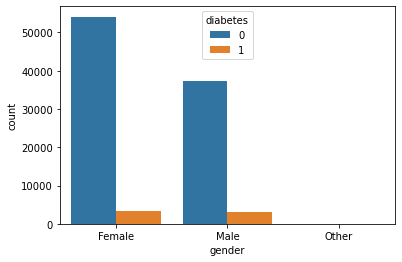

In [43]:
sns.countplot(df['gender'],hue=df['diabetes'])

In [44]:
label_df=df.groupby('gender')['diabetes'].value_counts().sort_values(ascending=False).index


In [45]:
val_df=df.groupby('gender')['diabetes'].value_counts().sort_values(ascending=False).values


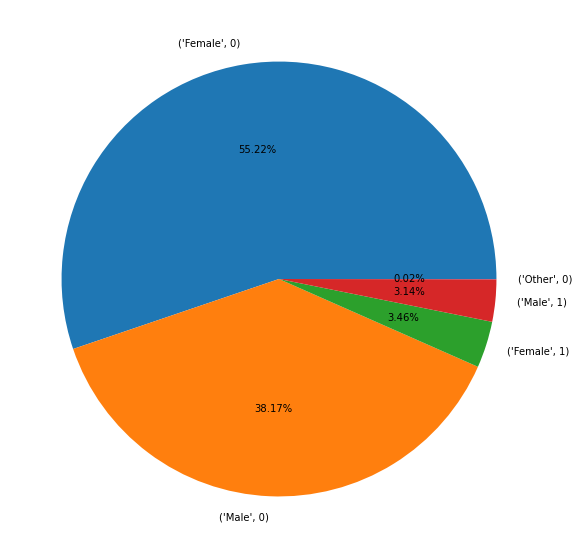

In [46]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

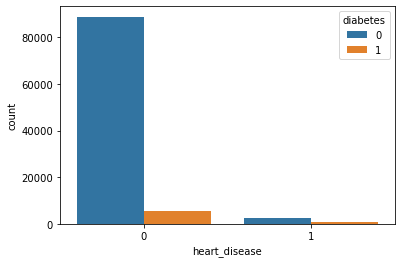

In [47]:
sns.countplot(df['heart_disease'],hue=df['diabetes'])

In [48]:
label_df=df.groupby('heart_disease')['diabetes'].value_counts().sort_values(ascending=False).index


In [49]:
val_df=df.groupby('heart_disease')['diabetes'].value_counts().sort_values(ascending=False).values


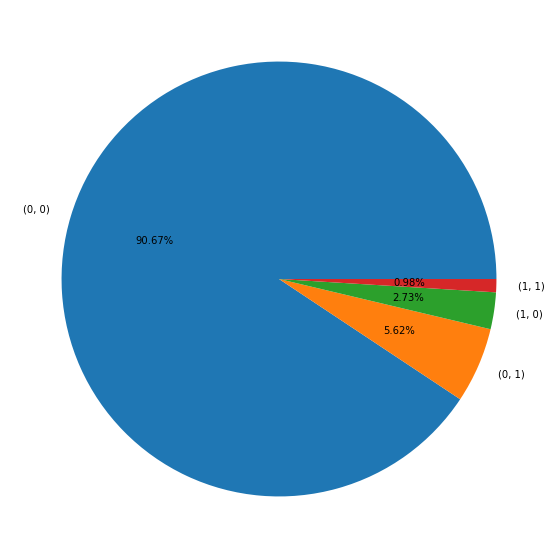

In [50]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_history', ylabel='count'>

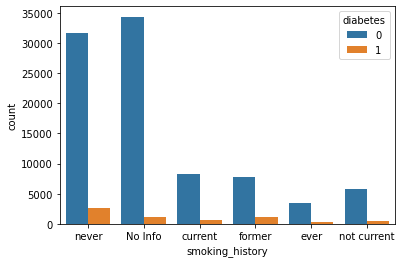

In [51]:
sns.countplot(df['smoking_history'],hue=df['diabetes'])

In [52]:
label_df=df.groupby('smoking_history')['diabetes'].value_counts().sort_values(ascending=False).index


In [53]:
val_df=df.groupby('smoking_history')['diabetes'].value_counts().sort_values(ascending=False).values


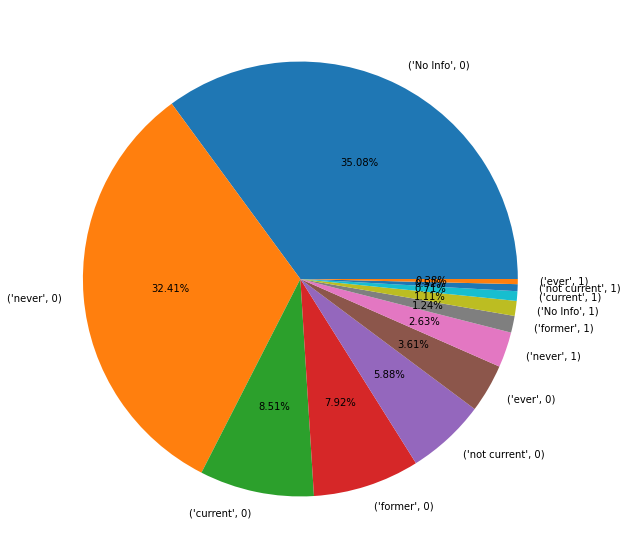

In [54]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

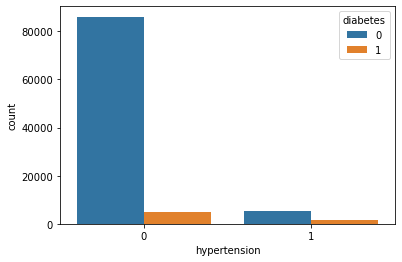

In [55]:
sns.countplot(df['hypertension'],hue=df['diabetes'])

In [56]:
label_df=df.groupby('hypertension')['diabetes'].value_counts().sort_values(ascending=False).index


In [57]:
val_df=df.groupby('hypertension')['diabetes'].value_counts().sort_values(ascending=False).values


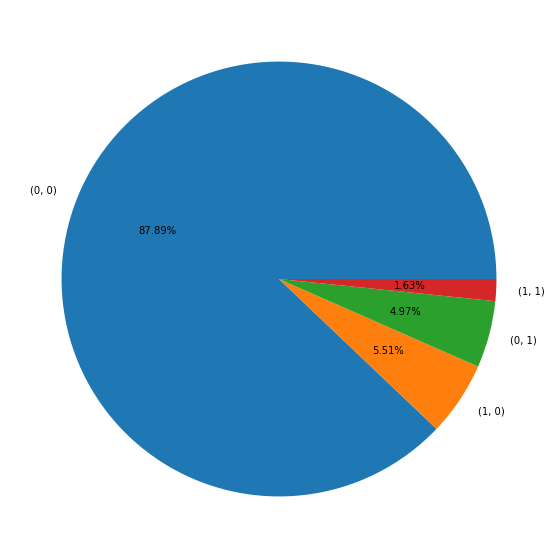

In [58]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='age'>

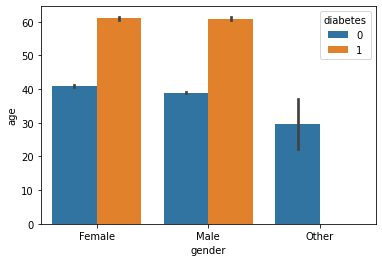

In [59]:
sns.barplot(x=df['gender'],y=df['age'],hue=df['diabetes'])

In [60]:
label_df=df.groupby(['gender','age'])['diabetes'].mean().sort_values(ascending=False).index


In [61]:
val_df=df.groupby(['gender','age'])['diabetes'].mean().sort_values(ascending=False).values


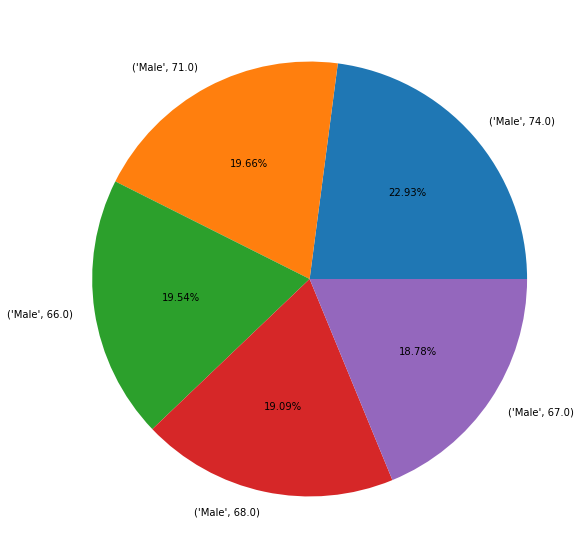

In [62]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='bmi'>

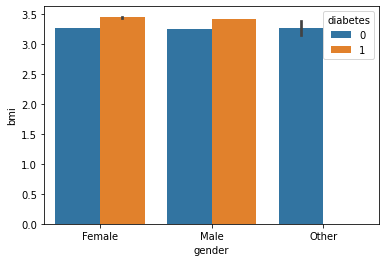

In [63]:
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetes'])

In [64]:
label_df=df.groupby(['gender','diabetes'])['bmi'].mean().sort_values(ascending=False).index


In [65]:
val_df=df.groupby(['gender','diabetes'])['bmi'].mean().sort_values(ascending=False).values


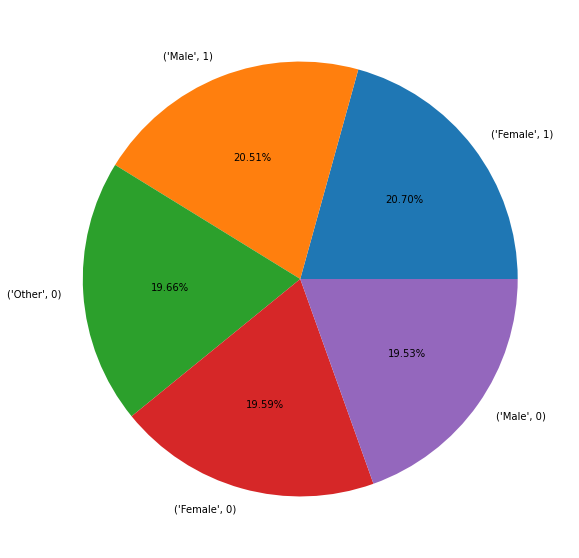

In [66]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='HbA1c_level'>

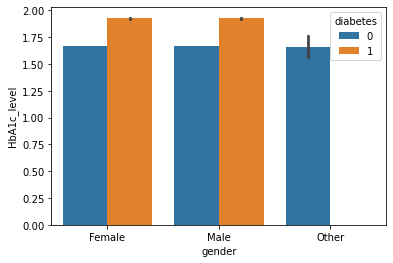

In [67]:
sns.barplot(x=df['gender'],y=df['HbA1c_level'],hue=df['diabetes'])

In [68]:
label_df=df.groupby(['gender','diabetes'])['HbA1c_level'].mean().sort_values(ascending=False).index


In [69]:
val_df=df.groupby(['gender','diabetes'])['HbA1c_level'].mean().sort_values(ascending=False).values


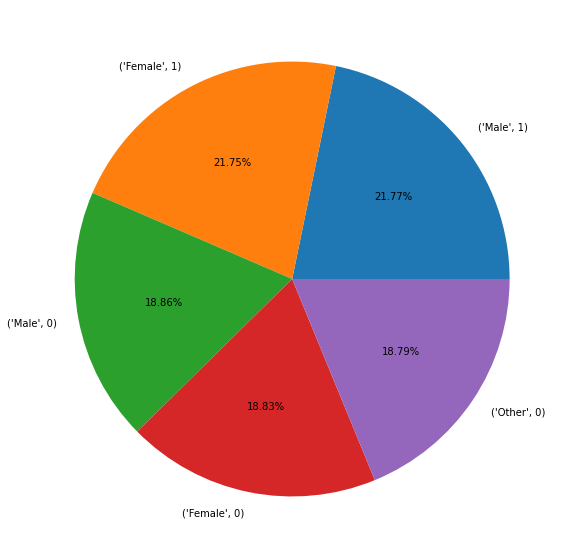

In [70]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='blood_glucose_level'>

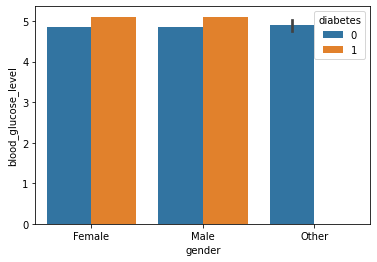

In [71]:
sns.barplot(x=df['gender'],y=df['blood_glucose_level'],hue=df['diabetes'])

In [72]:
label_df=df.groupby(['gender','diabetes'])['blood_glucose_level'].mean().sort_values(ascending=False).index


In [73]:
val_df=df.groupby(['gender','diabetes'])['blood_glucose_level'].mean().sort_values(ascending=False).values


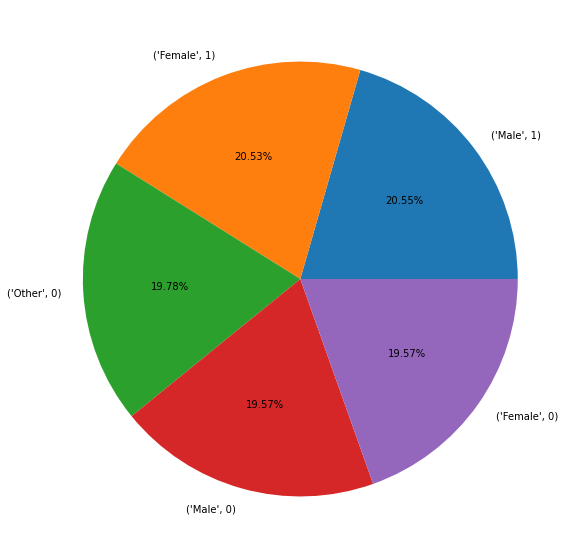

In [74]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='age'>

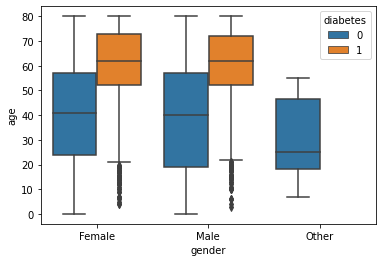

In [75]:
sns.boxplot(x=df['gender'],y=df['age'],hue=df['diabetes'])

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

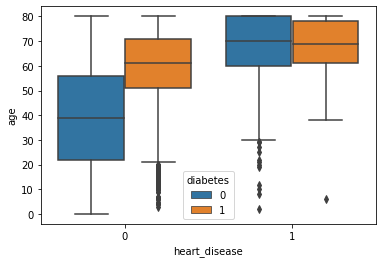

In [76]:
sns.boxplot(x=df['heart_disease'],y=df['age'],hue=df['diabetes'])

<AxesSubplot:xlabel='smoking_history', ylabel='age'>

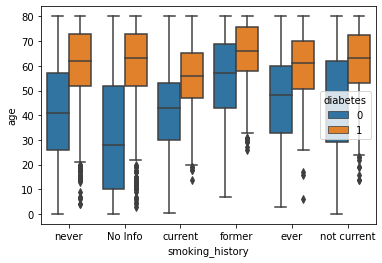

In [77]:
sns.boxplot(x=df['smoking_history'],y=df['age'],hue=df['diabetes'])

<AxesSubplot:xlabel='hypertension', ylabel='age'>

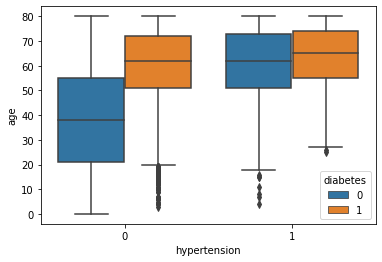

In [78]:
sns.boxplot(x=df['hypertension'],y=df['age'],hue=df['diabetes'])

<AxesSubplot:xlabel='gender', ylabel='blood_glucose_level'>

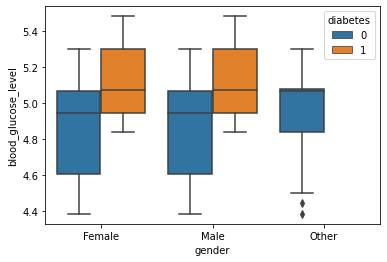

In [79]:
sns.boxplot(x=df['gender'],y=df['blood_glucose_level'],hue=df['diabetes'])

<AxesSubplot:xlabel='heart_disease', ylabel='HbA1c_level'>

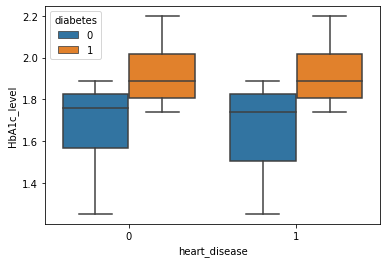

In [80]:
sns.boxplot(x=df['heart_disease'],y=df['HbA1c_level'],hue=df['diabetes'])

<AxesSubplot:xlabel='smoking_history', ylabel='blood_glucose_level'>

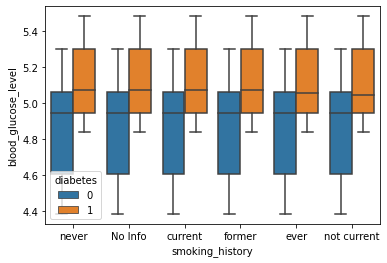

In [81]:
sns.boxplot(x=df['smoking_history'],y=df['blood_glucose_level'],hue=df['diabetes'])

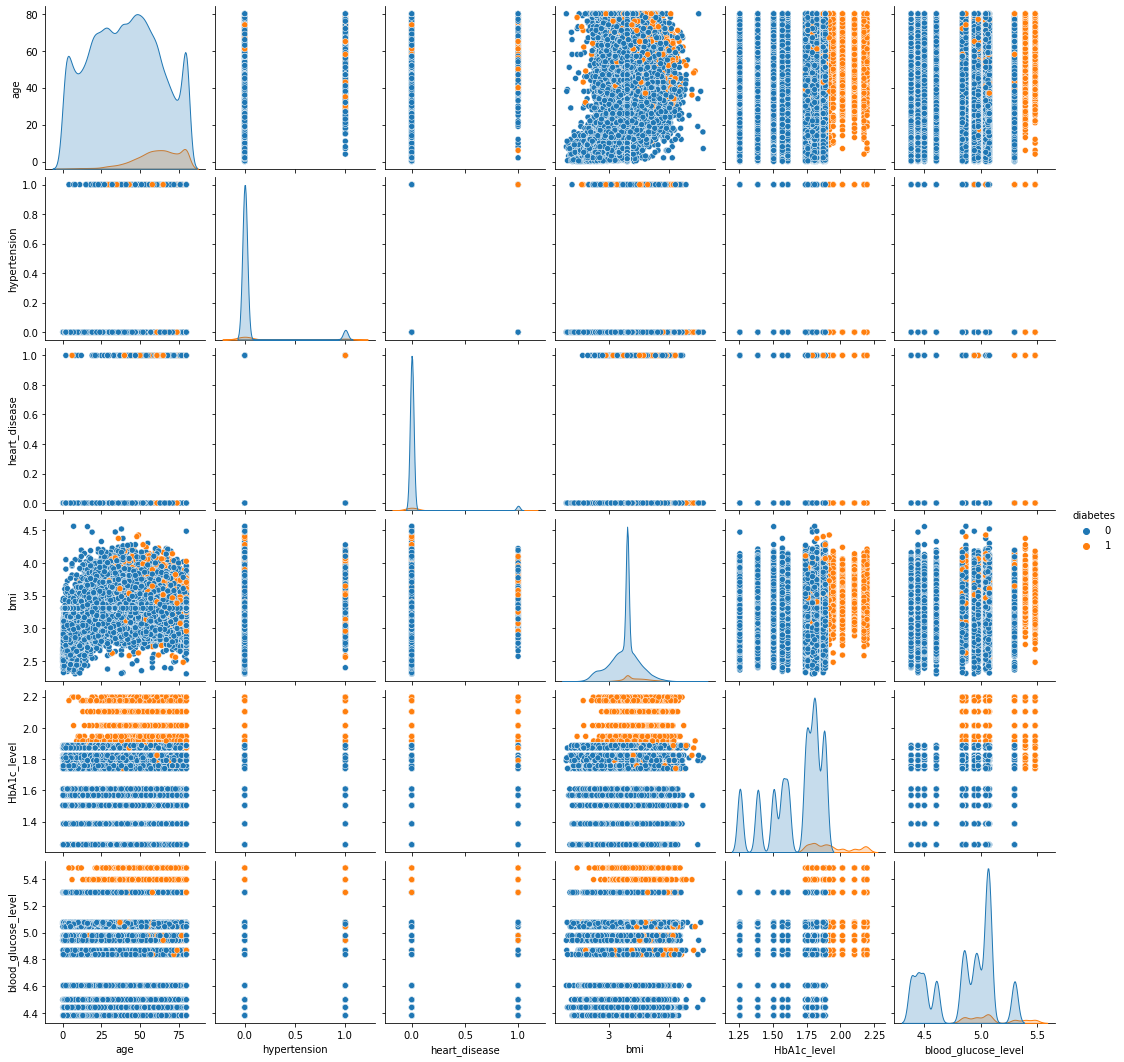

In [82]:
sns.pairplot(df,hue='diabetes')

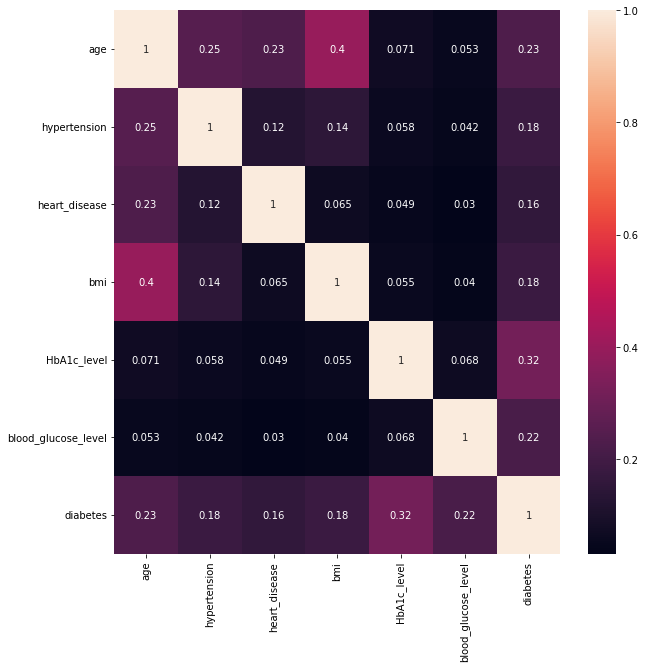

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [84]:
le=LabelEncoder()


In [85]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,3.226447,1.887070,4.941642,0
1,Female,54.0,0,0,No Info,3.307619,1.887070,4.382027,0
2,Male,28.0,0,0,never,3.307619,1.740466,5.062595,0
3,Female,36.0,0,0,current,3.154870,1.609438,5.043425,0
4,Male,76.0,1,1,current,3.002708,1.568616,5.043425,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,3.307619,1.824549,4.499810,0
99996,Female,2.0,0,0,No Info,2.854745,1.871802,4.605170,0
99997,Male,66.0,0,0,former,3.326115,1.740466,5.043425,0
99998,Female,24.0,0,0,never,3.567277,1.386294,4.605170,0


In [86]:
df['gender']=le.fit_transform(df['gender'])



C:\Users\himanshu\AppData\Local\Temp\ipykernel_20464\1132057880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(df['gender'])


In [87]:
df['smoking_history']=le.fit_transform(df['smoking_history'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_20464\3715695564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history']=le.fit_transform(df['smoking_history'])


In [88]:
y=df['diabetes']

In [89]:
X=df.drop('diabetes',axis=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [91]:
X_train.shape

(78369, 8)

In [92]:
X_test.shape

(19593, 8)

In [93]:
sc=StandardScaler()


In [94]:
X=sc.fit_transform(X)


In [95]:
rfc=RandomForestClassifier()


In [96]:
y_pred=rfc.fit(X_test,y_test)


In [97]:
y_pred=rfc.predict(X_test)


In [98]:
accuracy_score(y_test,y_pred)

0.9998979227275048

In [99]:
confusion_matrix(y_test,y_pred)

array([[18260,     0],
       [    2,  1331]], dtype=int64)

In [100]:
mean_squared_error(y_test,y_pred)

0.00010207727249527892

In [101]:
dtc=DecisionTreeClassifier()


In [102]:
y_pred=dtc.fit(X_test,y_test)


In [103]:
y_pred=dtc.predict(X_test)


In [104]:
accuracy_score(y_test,y_pred)

0.9998979227275048

In [105]:
mean_squared_error(y_test,y_pred)

0.00010207727249527892

In [106]:
knc=KNeighborsClassifier()


In [107]:
y_pred=knc.fit(X_test,y_test)


In [108]:
y_pred=knc.predict(X_test)


In [109]:
accuracy_score(y_test,y_pred)

0.9453376205787781

In [110]:
confusion_matrix(y_test,y_pred)

array([[18197,    63],
       [ 1008,   325]], dtype=int64)

In [111]:
mean_squared_error(y_test,y_pred)

0.05466237942122187

In [112]:
gbc=GradientBoostingClassifier()


In [113]:
y_pred=gbc.fit(X_test,y_test)


In [114]:
y_pred=gbc.predict(X_test)


In [115]:
accuracy_score(y_test,y_pred)

0.9721329046087889

In [116]:
confusion_matrix(y_test,y_pred)

array([[18239,    21],
       [  525,   808]], dtype=int64)

In [117]:
mean_squared_error(y_test,y_pred)

0.027867095391211148

In [118]:
xgb_i=xgb.XGBClassifier()


In [119]:
y_pred=xgb_i.fit(X_test,y_test)


In [120]:
y_pred=xgb_i.predict(X_test)


In [121]:
accuracy_score(y_test,y_pred)

0.9857602204869086

In [122]:
confusion_matrix(y_test,y_pred)

array([[18258,     2],
       [  277,  1056]], dtype=int64)

In [123]:
lr=LogisticRegression()


In [124]:
y_pred=lr.fit(X_test,y_test)


C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
y_pred=lr.predict(X_test)


In [126]:
accuracy_score(y_test,y_pred)

0.9557495023732966

In [127]:
confusion_matrix(y_test,y_pred)

array([[18098,   162],
       [  705,   628]], dtype=int64)

In [128]:
mean_squared_error(y_test,y_pred)

0.04425049762670341